Using CAMB 1.6.4 installed at /home/jipdebuck/miniconda3/envs/shared_env/lib/python3.12/site-packages/camb
Note: redshifts have been re-sorted (earliest first)
sigma 8 values at the two redshifts: [0.53304914 0.802608  ]


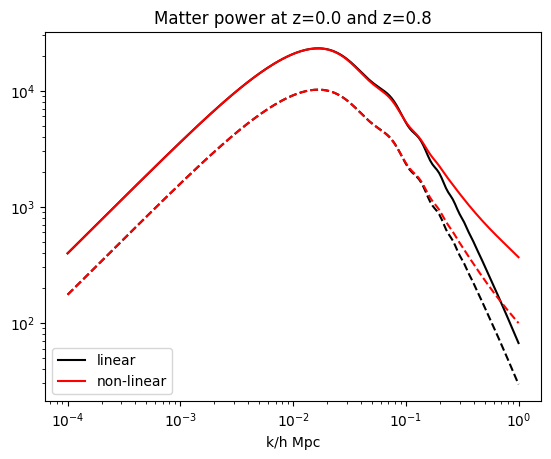

In [4]:
#Figure 1

!pip install camb
import os
import numpy as np
from matplotlib import pyplot as plt
import camb
from camb import model, initialpower
print('Using CAMB %s installed at %s' % (camb.__version__, os.path.dirname(camb.__file__)))
# Set up a new set of parameters for CAMB
# The defaults give one massive neutrino and helium set using BBN consistency
pars = camb.set_params(
    H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0, tau=0.06, As=2e-9, ns=0.965, halofit_version='mead', lmax=3000
)
results = camb.get_results(pars) #returns CAMBdata instance

# Now get matter power spectra and sigma8 at redshift 0 and 0.8
# parameters can all be passed as a dict as above, or you can call
# separate functions to set up the parameter object
pars = camb.set_params(H0=67.5, ombh2=0.022, omch2=0.122, ns=0.965)
# Note non-linear corrections couples to smaller scales than you want
pars.set_matter_power(redshifts=[0.0, 0.8], kmax=2.0)

# Linear spectra
pars.NonLinear = model.NonLinear_none
results = camb.get_results(pars)
kh, z, pk = results.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints=200)
s8 = np.array(results.get_sigma8())

# Non-Linear spectra (Halofit)
pars.NonLinear = model.NonLinear_both
results.calc_power_spectra(pars)
kh_nonlin, z_nonlin, pk_nonlin = results.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints=200)

print('sigma 8 values at the two redshifts:', results.get_sigma8())

for i, (redshift, line) in enumerate(zip(z, ['-', '--'])):
    plt.loglog(kh, pk[i, :], color='k', ls=line)
    plt.loglog(kh_nonlin, pk_nonlin[i, :], color='r', ls=line)
plt.xlabel('k/h Mpc')
plt.legend(['linear', 'non-linear'], loc='lower left')
plt.title('Matter power at z=%s and z=%s' % tuple(z))
plt.show()
